# Residency5: Unsupervised Learning Project_Qualitative Bankruptcy

### Objective:

Qualitative Bankruptcy analysis using Unsupervised Learning.

### Dataset Description:

Qualitative Bankruptcy database contains 250 instances with 6 qualitative parameters in bankruptcy and 1 class parameter.

Attribute Information: (P=Positive,A-Average,N-negative,B-Bankruptcy,NB-Non-Bankruptcy)
 
* Industrial Risk: {P,A,N}
* Management Risk: {P,A,N}
* Financial Flexibility: {P,A,N}
* Credibility: {P,A,N}
* Competitiveness: {P,A,N}
* Operating Risk: {P,A,N}
* Class: {NB,B} --->{0,1}

## Q1. Read the dataset and understand the features and target variable. 4 points

In [1]:
import os 
print(os.getcwd())

C:\Users\Venkatesh K Govindan\PGP-AIML\Project\Residency-5


In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='darkgrid', palette='spring', rc={'figure.figsize':(11,9)})

import warnings
warnings.filterwarnings('ignore')

In [3]:
colnames = ['Industrial_Risk', 'Management_Risk', 'Financial_Flexibility', 'Credibility', 'Competitiveness', 'Operating_Risk', 'Class']

In [4]:
bankruptcy_df = pd.read_csv('Qualitative_Bankruptcy.data.txt', sep=',', names=colnames)

In [5]:
bankruptcy_df.sample(10, random_state=1)

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk,Class
67,P,A,N,A,P,N,NB
249,P,N,N,N,A,A,B
230,A,P,N,N,N,N,B
161,A,N,N,N,N,N,B
91,P,A,A,P,P,P,NB
224,P,A,N,N,N,N,B
58,N,P,N,P,P,A,NB
234,N,A,N,N,N,N,B
180,N,N,N,N,N,N,B
4,N,N,P,P,P,N,NB


#### * Observe that all features are categorical.

In [6]:
bankruptcy_df.shape

(250, 7)

In [7]:
bankruptcy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Industrial_Risk          250 non-null object
Management_Risk          250 non-null object
Financial_Flexibility    250 non-null object
Credibility              250 non-null object
Competitiveness          250 non-null object
Operating_Risk           250 non-null object
Class                    250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


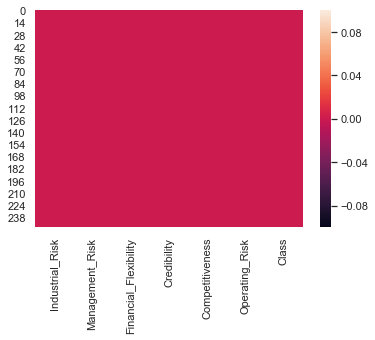

In [8]:
sns.heatmap(bankruptcy_df.isna())

In [9]:
bankruptcy_df.apply(lambda x : sum(x.isna()))

Industrial_Risk          0
Management_Risk          0
Financial_Flexibility    0
Credibility              0
Competitiveness          0
Operating_Risk           0
Class                    0
dtype: int64

#### * Observe there are no missing values

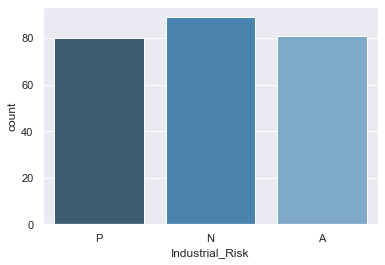

In [10]:
sns.countplot(x='Industrial_Risk', data=bankruptcy_df, palette="Blues_d")

In [11]:
print(bankruptcy_df['Industrial_Risk'].value_counts().sum())
bankruptcy_df['Industrial_Risk'].value_counts()

250


N    89
A    81
P    80
Name: Industrial_Risk, dtype: int64

#### * Observe that Industrial_Risk feature has 3 valid values N - Negative, A - Average and P - Positive; all are almost with same spread.

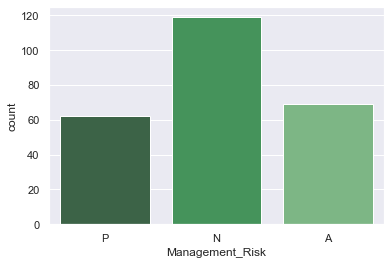

In [12]:
sns.countplot(x='Management_Risk', data=bankruptcy_df, palette="Greens_d")

In [13]:
print(bankruptcy_df['Management_Risk'].value_counts().sum())
bankruptcy_df['Management_Risk'].value_counts()

250


N    119
A     69
P     62
Name: Management_Risk, dtype: int64

#### * Observe that Management_Risk feature has 3 valid values N - Negative, A - Average and P - Positive; spread of N is almost double when compared to others.

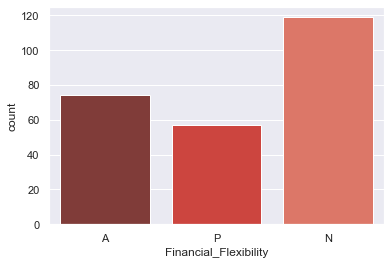

In [14]:
sns.countplot(x='Financial_Flexibility', data=bankruptcy_df, palette="Reds_d")

In [15]:
print(bankruptcy_df['Financial_Flexibility'].value_counts().sum())
bankruptcy_df['Financial_Flexibility'].value_counts()

250


N    119
A     74
P     57
Name: Financial_Flexibility, dtype: int64

#### * Observe that Financial_Flexibility feature has 3 valid values N - Negative, A - Average and P - Positive; spread of N is almost double when compared to others.

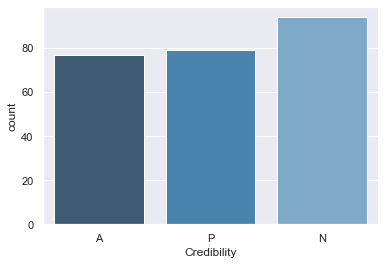

In [16]:
sns.countplot(x='Credibility', data=bankruptcy_df, palette="Blues_d")

In [17]:
print(bankruptcy_df['Credibility'].value_counts().sum())
bankruptcy_df['Credibility'].value_counts()

250


N    94
P    79
A    77
Name: Credibility, dtype: int64

#### * Observe that Credibility feature has 3 valid values N - Negative, A - Average and P - Positive; spread of N is little more when compared to others.

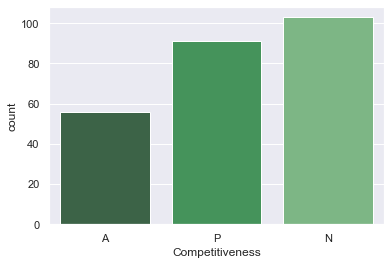

In [18]:
sns.countplot(x='Competitiveness', data=bankruptcy_df, palette="Greens_d")

In [19]:
print(bankruptcy_df['Competitiveness'].value_counts().sum())
bankruptcy_df['Competitiveness'].value_counts()

250


N    103
P     91
A     56
Name: Competitiveness, dtype: int64

#### * Observe that Competitiveness feature has 3 valid values N - Negative, A - Average and P - Positive; spread of A is almost half   when compared to others.

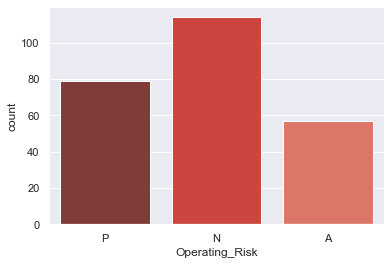

In [20]:
sns.countplot(x='Operating_Risk', data=bankruptcy_df, palette="Reds_d")

In [21]:
print(bankruptcy_df['Operating_Risk'].value_counts().sum())
bankruptcy_df['Operating_Risk'].value_counts()

250


N    114
P     79
A     57
Name: Operating_Risk, dtype: int64

#### * Observe that Operating_Risk feature has 3 valid values N - Negative, A - Average and P - Positive; spread of A is less than P, which is less than N.

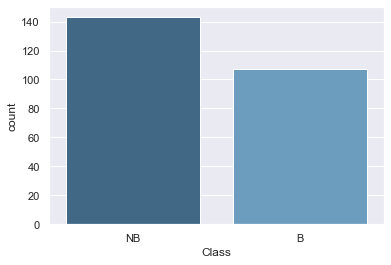

In [22]:
sns.countplot(x='Class', data=bankruptcy_df, palette="Blues_d")

In [23]:
print(bankruptcy_df['Class'].value_counts().sum())
bankruptcy_df['Class'].value_counts()

250


NB    143
B     107
Name: Class, dtype: int64

In [24]:
bankruptcy_df.groupby('Class').count()

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk
Class,,,,,,
B,107,107,107,107,107,107
NB,143,143,143,143,143,143


#### * Observe that Class target has 2 valid values NB - Non Bankruptcy and B - Bankruptcy; with almost 60:40 spread.

## Q2. Encode independent features. 4 points

In [25]:
bankruptcy_df.shape

(250, 7)

In [26]:
bankruptcy_df.dtypes

Industrial_Risk          object
Management_Risk          object
Financial_Flexibility    object
Credibility              object
Competitiveness          object
Operating_Risk           object
Class                    object
dtype: object

In [27]:
bankruptcy_df_copy = pd.get_dummies(bankruptcy_df, columns=['Industrial_Risk', 'Management_Risk', 'Financial_Flexibility', 'Credibility', 'Competitiveness', 'Operating_Risk'], drop_first=True)

In [28]:
bankruptcy_df_copy.sample(10,random_state=1)

,Class,Industrial_Risk_N,Industrial_Risk_P,Management_Risk_N,Management_Risk_P,Financial_Flexibility_N,Financial_Flexibility_P,Credibility_N,Credibility_P,Competitiveness_N,Competitiveness_P,Operating_Risk_N,Operating_Risk_P
67,NB,0,1,0,0,1,0,0,0,0,1,1,0
249,B,0,1,1,0,1,0,1,0,0,0,0,0
230,B,0,0,0,1,1,0,1,0,1,0,1,0
161,B,0,0,1,0,1,0,1,0,1,0,1,0
91,NB,0,1,0,0,0,0,0,1,0,1,0,1
224,B,0,1,0,0,1,0,1,0,1,0,1,0
58,NB,1,0,0,1,1,0,0,1,0,1,0,0
234,B,1,0,0,0,1,0,1,0,1,0,1,0
180,B,1,0,1,0,1,0,1,0,1,0,1,0
4,NB,1,0,1,0,0,1,0,1,0,1,1,0


In [29]:
bankruptcy_df_copy.shape

(250, 13)

In [30]:
bankruptcy_df_copy.dtypes

Class                      object
Industrial_Risk_N           uint8
Industrial_Risk_P           uint8
Management_Risk_N           uint8
Management_Risk_P           uint8
Financial_Flexibility_N     uint8
Financial_Flexibility_P     uint8
Credibility_N               uint8
Credibility_P               uint8
Competitiveness_N           uint8
Competitiveness_P           uint8
Operating_Risk_N            uint8
Operating_Risk_P            uint8
dtype: object

#### * Using get_dummies encoding method, encoded all independent features and dropped one dummy column.

#### * Converting dependent variable Class values 'NB' as 0 nd 'B' as 1, this is to compare with cluster labels.

In [31]:
new_class=[]
for i in bankruptcy_df_copy.itertuples(): 
    if i.Class=='NB':
        new_class.append(0)
    elif i.Class=='B':
        new_class.append(1)
bankruptcy_df_copy['Class'] = pd.DataFrame(new_class)

In [32]:
bankruptcy_df_copy.sample(10, random_state=1)

,Class,Industrial_Risk_N,Industrial_Risk_P,Management_Risk_N,Management_Risk_P,Financial_Flexibility_N,Financial_Flexibility_P,Credibility_N,Credibility_P,Competitiveness_N,Competitiveness_P,Operating_Risk_N,Operating_Risk_P
67,0,0,1,0,0,1,0,0,0,0,1,1,0
249,1,0,1,1,0,1,0,1,0,0,0,0,0
230,1,0,0,0,1,1,0,1,0,1,0,1,0
161,1,0,0,1,0,1,0,1,0,1,0,1,0
91,0,0,1,0,0,0,0,0,1,0,1,0,1
224,1,0,1,0,0,1,0,1,0,1,0,1,0
58,0,1,0,0,1,1,0,0,1,0,1,0,0
234,1,1,0,0,0,1,0,1,0,1,0,1,0
180,1,1,0,1,0,1,0,1,0,1,0,1,0
4,0,1,0,1,0,0,1,0,1,0,1,1,0


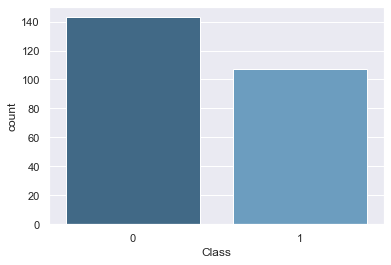

In [33]:
sns.countplot(x='Class', data=bankruptcy_df_copy, palette="Blues_d")

In [34]:
bankruptcy_df_copy['Class'].value_counts()

0    143
1    107
Name: Class, dtype: int64

## Q3. Separate the dependant variable from the rest of the train data. 2 point

In [35]:
bankruptcy_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
Class                      250 non-null int64
Industrial_Risk_N          250 non-null uint8
Industrial_Risk_P          250 non-null uint8
Management_Risk_N          250 non-null uint8
Management_Risk_P          250 non-null uint8
Financial_Flexibility_N    250 non-null uint8
Financial_Flexibility_P    250 non-null uint8
Credibility_N              250 non-null uint8
Credibility_P              250 non-null uint8
Competitiveness_N          250 non-null uint8
Competitiveness_P          250 non-null uint8
Operating_Risk_N           250 non-null uint8
Operating_Risk_P           250 non-null uint8
dtypes: int64(1), uint8(12)
memory usage: 5.0 KB


In [36]:
X=bankruptcy_df_copy.copy()
y=X.pop('Class')

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
Industrial_Risk_N          250 non-null uint8
Industrial_Risk_P          250 non-null uint8
Management_Risk_N          250 non-null uint8
Management_Risk_P          250 non-null uint8
Financial_Flexibility_N    250 non-null uint8
Financial_Flexibility_P    250 non-null uint8
Credibility_N              250 non-null uint8
Credibility_P              250 non-null uint8
Competitiveness_N          250 non-null uint8
Competitiveness_P          250 non-null uint8
Operating_Risk_N           250 non-null uint8
Operating_Risk_P           250 non-null uint8
dtypes: uint8(12)
memory usage: 3.0 KB


In [38]:
X.sample(10, random_state=1)

,Industrial_Risk_N,Industrial_Risk_P,Management_Risk_N,Management_Risk_P,Financial_Flexibility_N,Financial_Flexibility_P,Credibility_N,Credibility_P,Competitiveness_N,Competitiveness_P,Operating_Risk_N,Operating_Risk_P
67,0,1,0,0,1,0,0,0,0,1,1,0
249,0,1,1,0,1,0,1,0,0,0,0,0
230,0,0,0,1,1,0,1,0,1,0,1,0
161,0,0,1,0,1,0,1,0,1,0,1,0
91,0,1,0,0,0,0,0,1,0,1,0,1
224,0,1,0,0,1,0,1,0,1,0,1,0
58,1,0,0,1,1,0,0,1,0,1,0,0
234,1,0,0,0,1,0,1,0,1,0,1,0
180,1,0,1,0,1,0,1,0,1,0,1,0
4,1,0,1,0,0,1,0,1,0,1,1,0


In [39]:
y.sample(10, random_state=1)

67     0
249    1
230    1
161    1
91     0
224    1
58     0
234    1
180    1
4      0
Name: Class, dtype: int64

## Q4. Split the dataset into training and test data ( Take 80:20 ratio). 2 points

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=1)

In [42]:
print('Train set:', X_train.shape,'\t',y_train.shape)
print('Test set: ', X_test.shape,'\t',y_test.shape)

Train set: (200, 12) 	 (200,)
Test set:  (50, 12) 	 (50,)


In [43]:
X_train.head()

,Industrial_Risk_N,Industrial_Risk_P,Management_Risk_N,Management_Risk_P,Financial_Flexibility_N,Financial_Flexibility_P,Credibility_N,Credibility_P,Competitiveness_N,Competitiveness_P,Operating_Risk_N,Operating_Risk_P
228,0,0,0,0,1,0,1,0,1,0,1,0
85,0,0,1,0,1,0,1,0,0,1,0,1
112,1,0,1,0,0,1,0,1,0,1,1,0
148,1,0,1,0,1,0,0,0,1,0,0,0
171,0,0,0,1,1,0,1,0,1,0,1,0


In [44]:
X_test.head()

,Industrial_Risk_N,Industrial_Risk_P,Management_Risk_N,Management_Risk_P,Financial_Flexibility_N,Financial_Flexibility_P,Credibility_N,Credibility_P,Competitiveness_N,Competitiveness_P,Operating_Risk_N,Operating_Risk_P
67,0,1,0,0,1,0,0,0,0,1,1,0
249,0,1,1,0,1,0,1,0,0,0,0,0
230,0,0,0,1,1,0,1,0,1,0,1,0
161,0,0,1,0,1,0,1,0,1,0,1,0
91,0,1,0,0,0,0,0,1,0,1,0,1


## Q5. Apply PCA on the independent features of train data. 2 point

In [45]:
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components=None,random_state=1)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=1,
    svd_solver='auto', tol=0.0, whiten=False)

In [47]:
print('Covariance matrix for PCA:', pca.get_covariance())

Covariance matrix for PCA: [[ 0.23155779 -0.10673367  0.10090452 -0.03336683  0.0359799  -0.02150754
   0.0201005  -0.02351759  0.0759799  -0.05628141  0.04864322 -0.03718593]
 [-0.10673367  0.2090201  -0.03324121  0.01781407 -0.04386935  0.03437186
   0.00942211 -0.0029397  -0.04766332  0.0419598  -0.00836683  0.03932161]
 [ 0.10090452 -0.03324121  0.25103015 -0.11942211  0.07241206 -0.03658291
   0.05841709 -0.04298995  0.0791206  -0.06005025  0.02917085 -0.0428392 ]
 [-0.03336683  0.01781407 -0.11942211  0.18590452 -0.04035176  0.01125628
  -0.06218593  0.0430402  -0.05193467  0.01432161 -0.01163317  0.06067839]
 [ 0.0359799  -0.04386935  0.07241206 -0.04035176  0.25035176 -0.11336683
   0.14949749 -0.08346734  0.19592965 -0.1201005   0.01562814 -0.03291457]
 [-0.02150754  0.03437186 -0.03658291  0.01125628 -0.11336683  0.18331658
  -0.07035176  0.04462312 -0.09507538  0.08140704 -0.00442211  0.00703518]
 [ 0.0201005   0.00942211  0.05841709 -0.06218593  0.14949749 -0.07035176
   0.

In [48]:
print('Explained variance ratio:', pca.explained_variance_ratio_)
print('\nSum of explained variance ratio is:', pca.explained_variance_ratio_.sum())

Explained variance ratio: [0.35200428 0.14400695 0.12195856 0.09628021 0.06209991 0.05201819
 0.0436356  0.03948538 0.02951205 0.0250634  0.02191483 0.01202065]

Sum of explained variance ratio is: 0.9999999999999997


## Q6. Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance). 6 points

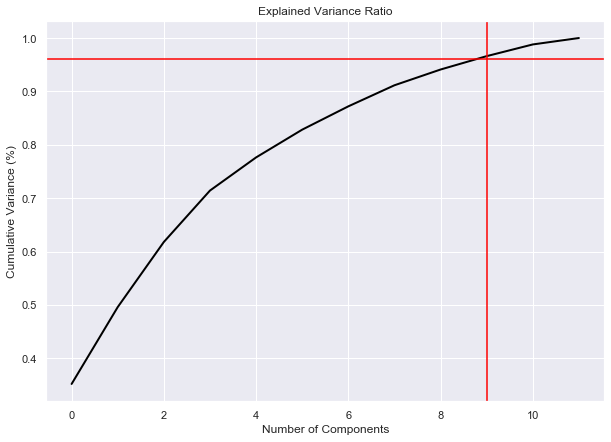

In [49]:
plt.figure(figsize=(10,7))

plt.plot(np.cumsum(pca.explained_variance_ratio_), c='k', lw=2)

plt.axvline(9, c='r')
plt.axhline(0.96, c='r')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance (%)') 
plt.title('Explained Variance Ratio')
plt.show()

#### * Optimum number of PC's are 10, which covers above 96% of variances.

## Q7. Transform the data using PCA ( select optimum number of PCs). 4 points

In [50]:
pca = PCA(n_components=10,random_state=1)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=1,
    svd_solver='auto', tol=0.0, whiten=False)

In [51]:
print('Explained variance ratio:', pca.explained_variance_ratio_)
print('\nSum of explained variance ratio is:', pca.explained_variance_ratio_.sum())

Explained variance ratio: [0.35200428 0.14400695 0.12195856 0.09628021 0.06209991 0.05201819
 0.0436356  0.03948538 0.02951205 0.0250634 ]

Sum of explained variance ratio is: 0.9660645169659753


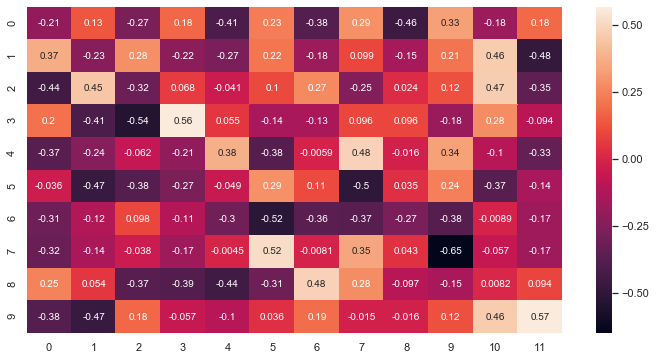

In [52]:
plt.figure(figsize=(12,6))
sns.heatmap(pd.DataFrame(pca.components_),annot=True)

In [53]:
X_train.head(5)

,Industrial_Risk_N,Industrial_Risk_P,Management_Risk_N,Management_Risk_P,Financial_Flexibility_N,Financial_Flexibility_P,Credibility_N,Credibility_P,Competitiveness_N,Competitiveness_P,Operating_Risk_N,Operating_Risk_P
228,0,0,0,0,1,0,1,0,1,0,1,0
85,0,0,1,0,1,0,1,0,0,1,0,1
112,1,0,1,0,0,1,0,1,0,1,1,0
148,1,0,1,0,1,0,0,0,1,0,0,0
171,0,0,0,1,1,0,1,0,1,0,1,0


In [54]:
X_train_pca=pca.transform(X_train)

In [55]:
print(X_train_pca.shape)

(200, 10)


In [56]:
X_train_pca

array([[-1.02188449, -0.22587566,  0.71216477, ...,  0.24887893,
         0.18982501,  0.29171062],
       [-0.14474068, -0.52778121, -0.32328485, ..., -0.59416415,
        -0.1407454 ,  0.71047007],
       [ 0.599653  ,  1.55176674, -0.31588291, ...,  0.07521076,
        -0.04600845,  0.15461258],
       ...,
       [ 0.68119681, -0.30949683, -0.12346877, ...,  0.45306247,
        -0.2939663 ,  0.06655874],
       [-1.11453774, -0.40536614, -0.07300477, ...,  0.26800266,
        -0.18629305,  0.00572245],
       [ 0.75213629,  0.50317701, -0.44744862, ..., -0.0660077 ,
         0.00421159,  0.03797766]])

## Q8. Apply KMeans algorithm on the above transformed data. 6 points

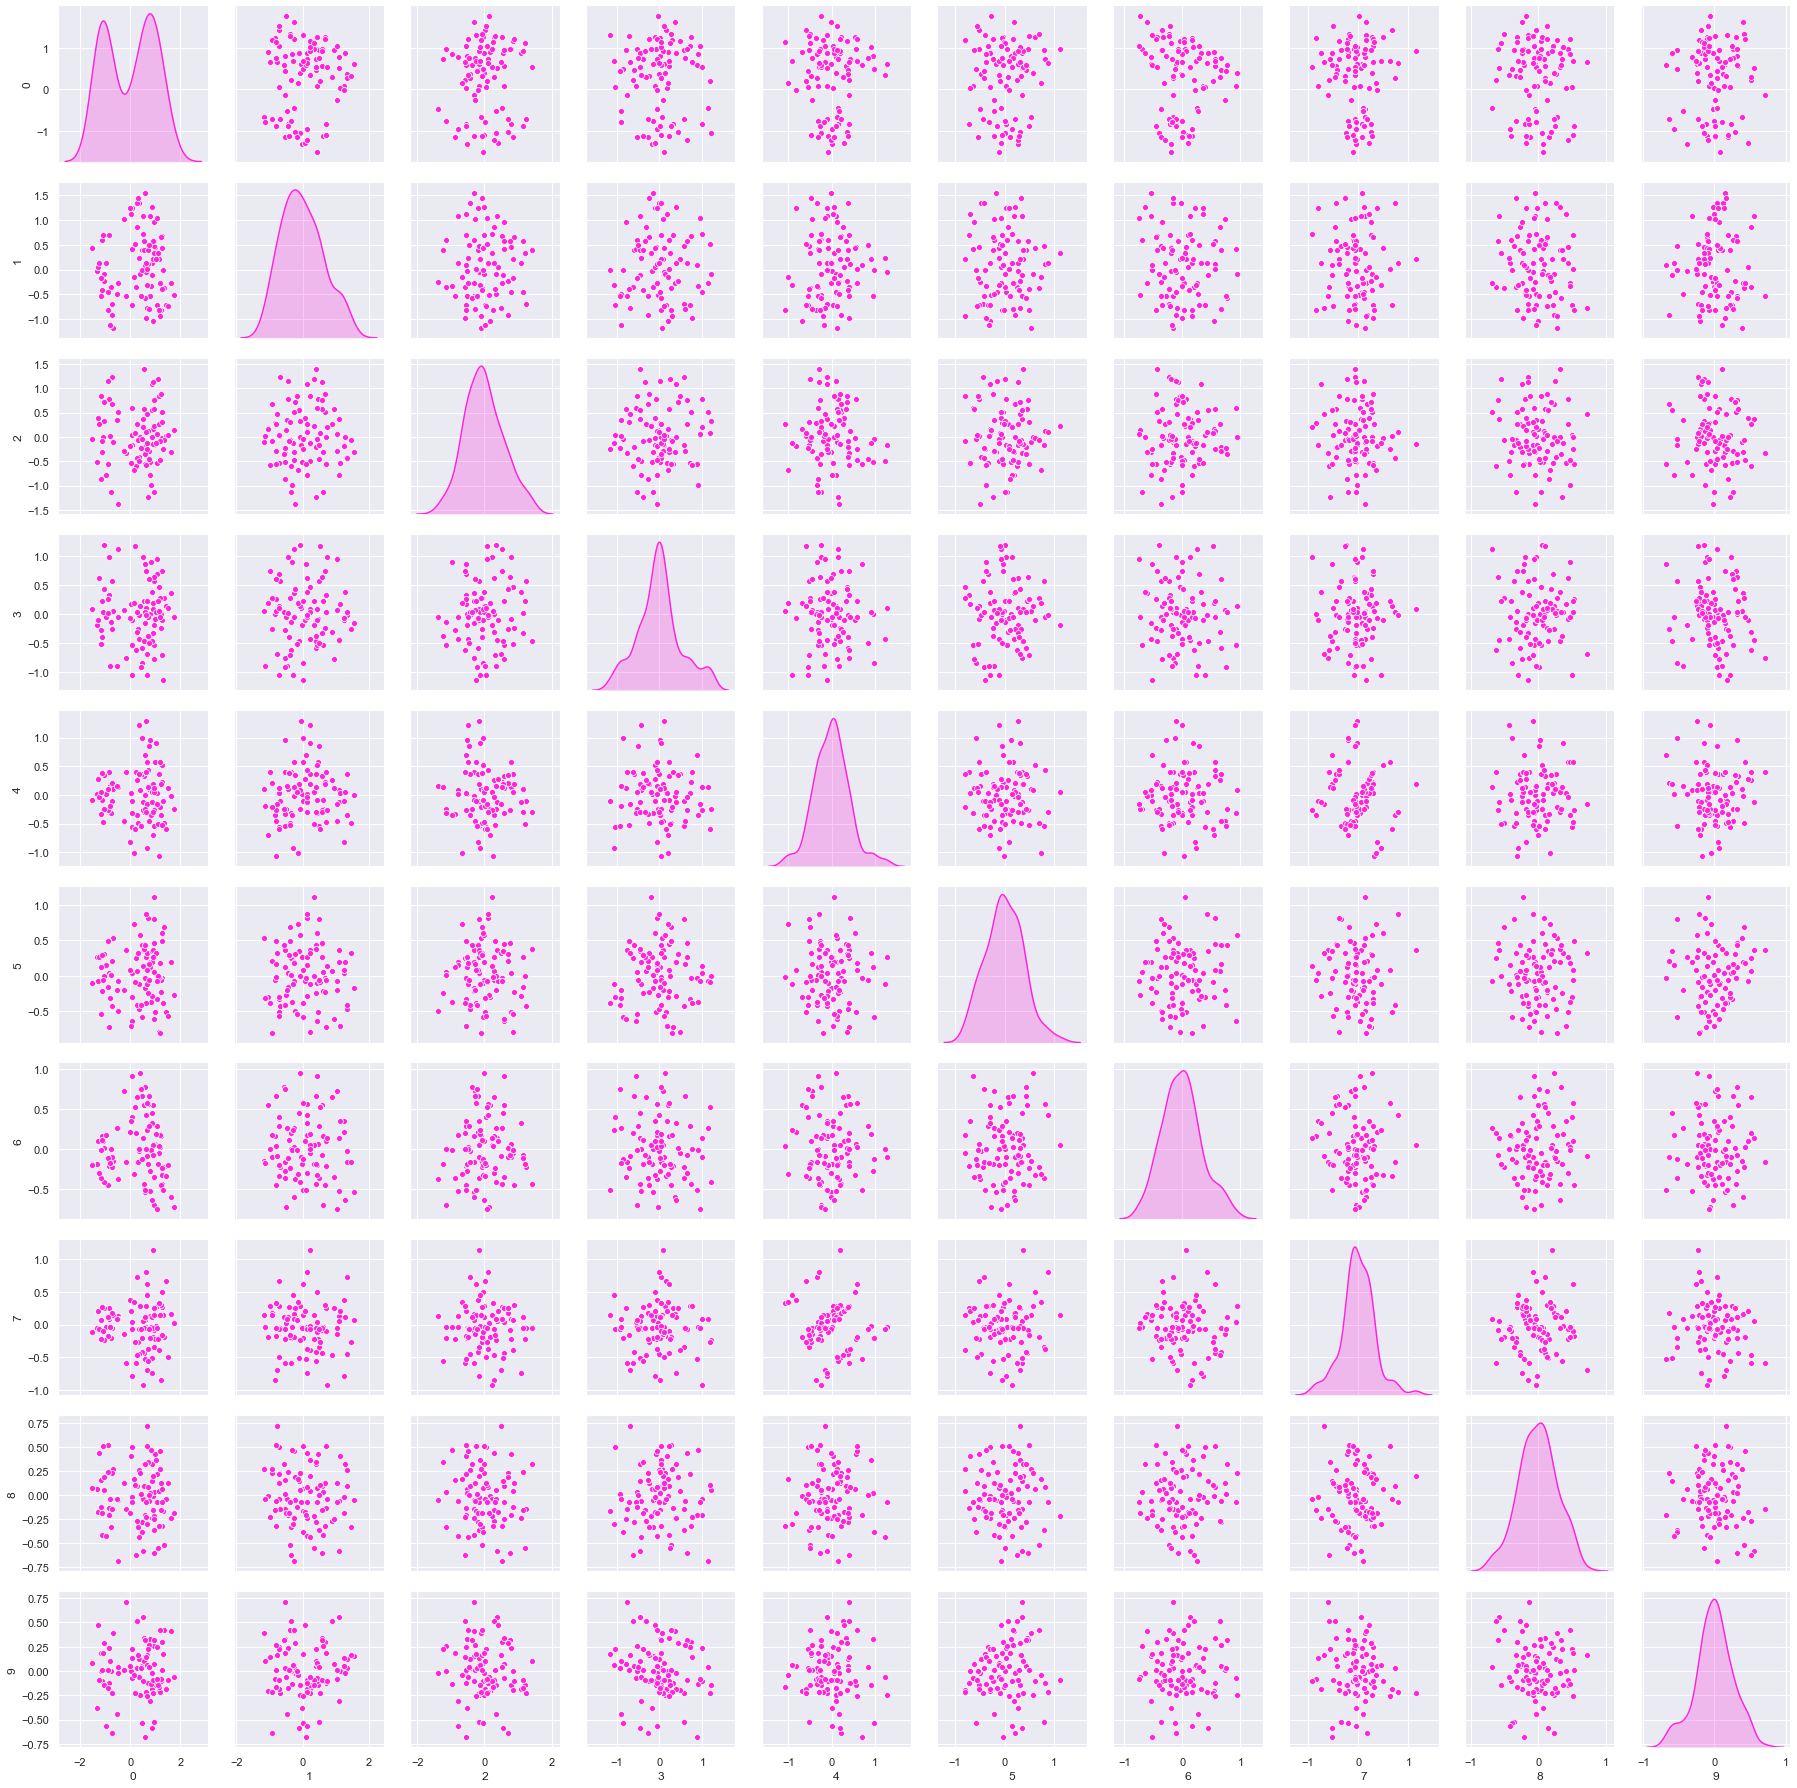

In [57]:
sns.pairplot(pd.DataFrame(X_train_pca),diag_kind='kde')

In [58]:
from sklearn.cluster import KMeans

In [59]:
cluster_errors=[]
cluster_range=range(1, 11)   
for num_clusters in cluster_range:
  clusters=KMeans(num_clusters,n_init=10,max_iter=300,random_state=1,n_jobs=-1)
  clusters.fit(X_train_pca)
  labels=clusters.labels_                     
  centroids=clusters.cluster_centers_         
  cluster_errors.append(clusters.inertia_)    

In [60]:
clusters_df=pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})
clusters_df[0:]

,num_clusters,cluster_errors
0,1,519.781353
1,2,355.901576
2,3,306.261433
3,4,278.212290
4,5,252.992589
5,6,236.001424
6,7,217.668995
7,8,203.642944
8,9,189.468036
9,10,178.703745


## Q9. Select optimal number of clusters and form clusters out of the train data. 10 points

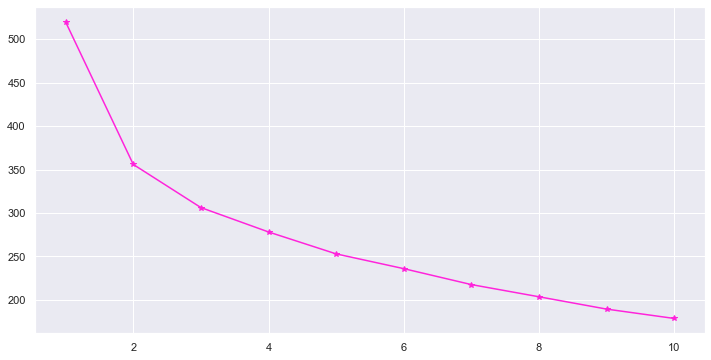

In [61]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker = "*")

In [62]:
errors=clusters_df['cluster_errors']

In [63]:
for i in range(9):
    print(errors[i+1]-errors[i])

-163.87977718766825
-49.640142643282616
-28.04914317662775
-25.21970105692
-16.991164408293884
-18.33242873652489
-14.026051071037386
-14.17490843727461
-10.76429146501414


In [64]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

For n_clusters = 2 The average silhouette_score is : 0.2918026939045623


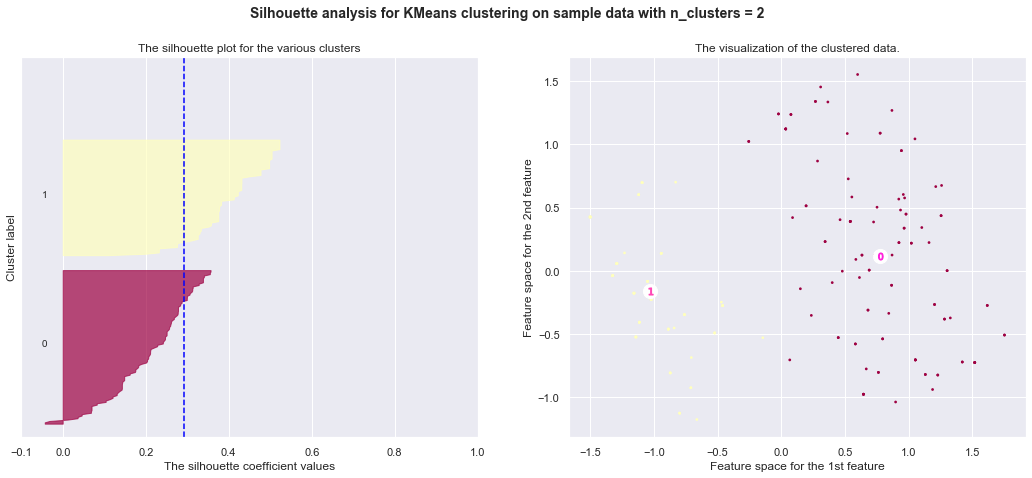

For n_clusters = 3 The average silhouette_score is : 0.2657004708176264


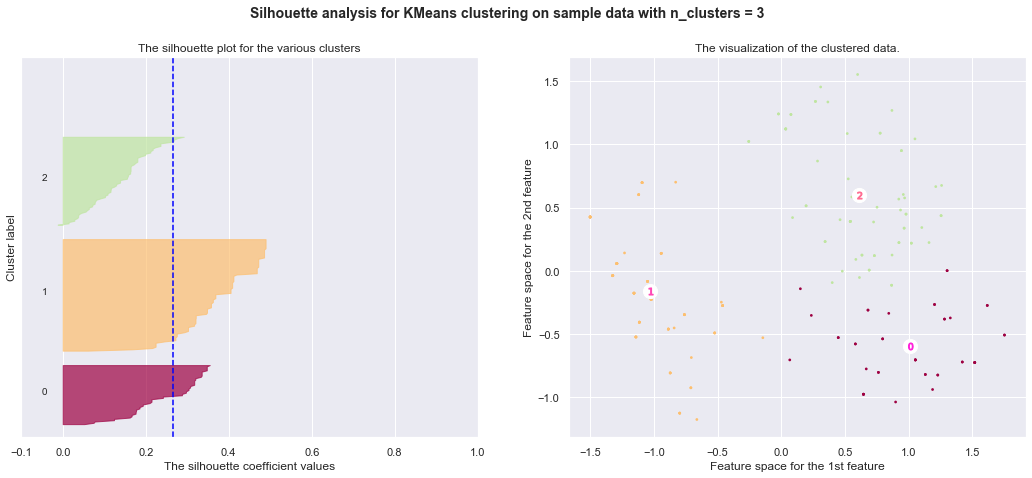

For n_clusters = 4 The average silhouette_score is : 0.2092127892248649


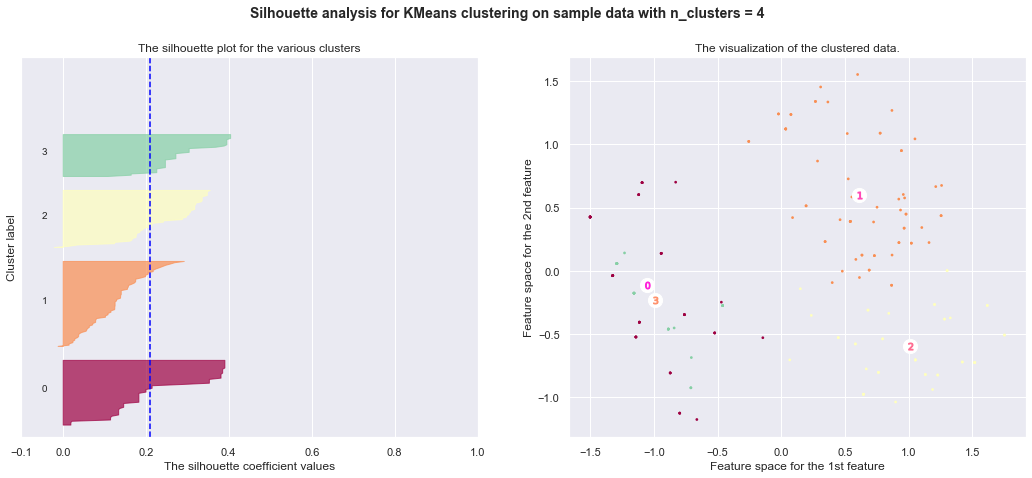

For n_clusters = 5 The average silhouette_score is : 0.2172170622579133


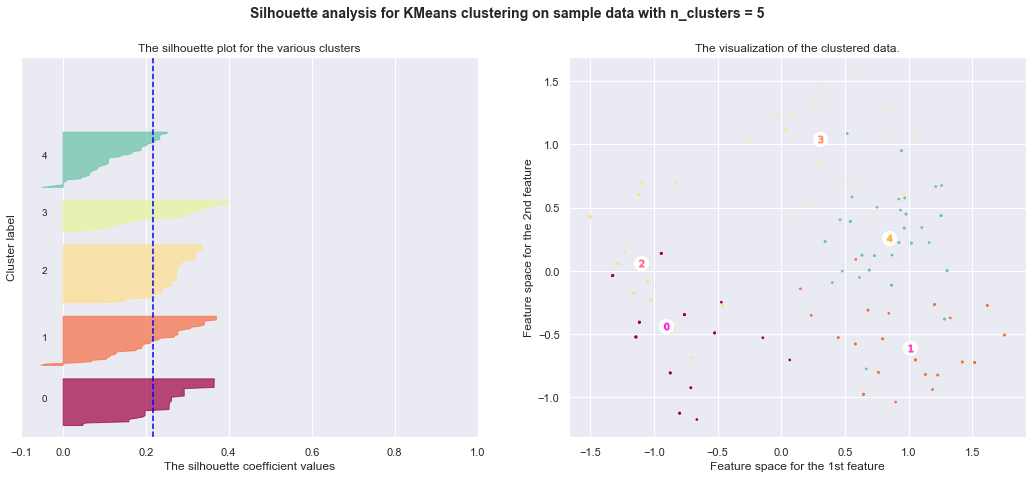

For n_clusters = 6 The average silhouette_score is : 0.22179261896872668


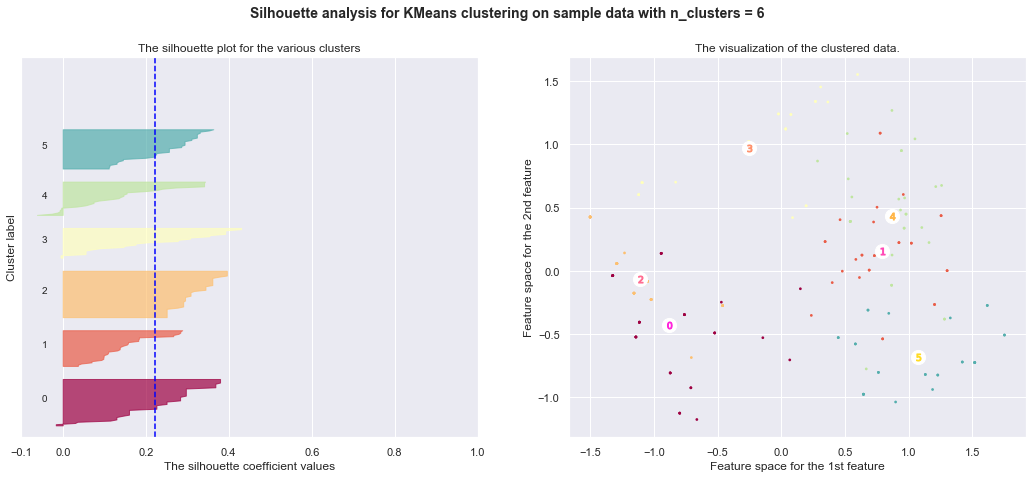

For n_clusters = 7 The average silhouette_score is : 0.21662278350988826


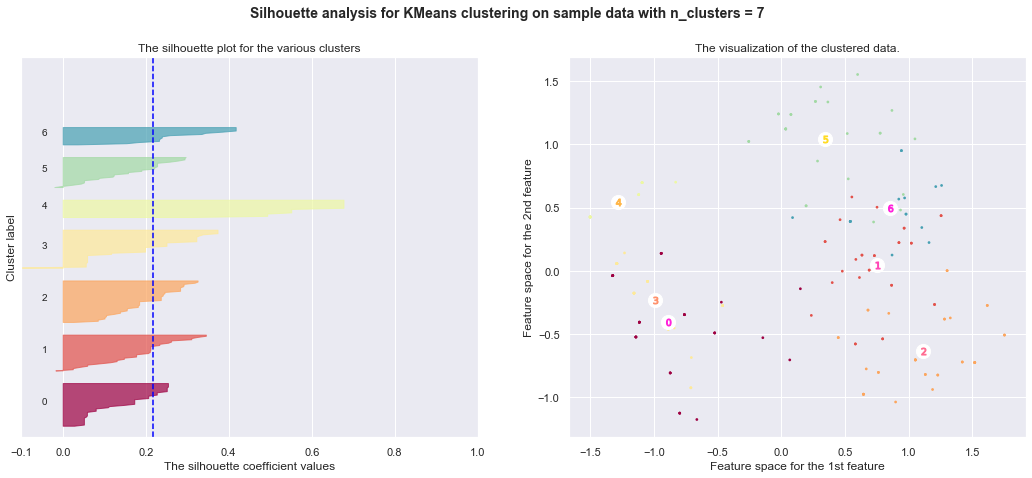

For n_clusters = 8 The average silhouette_score is : 0.24204983521332743


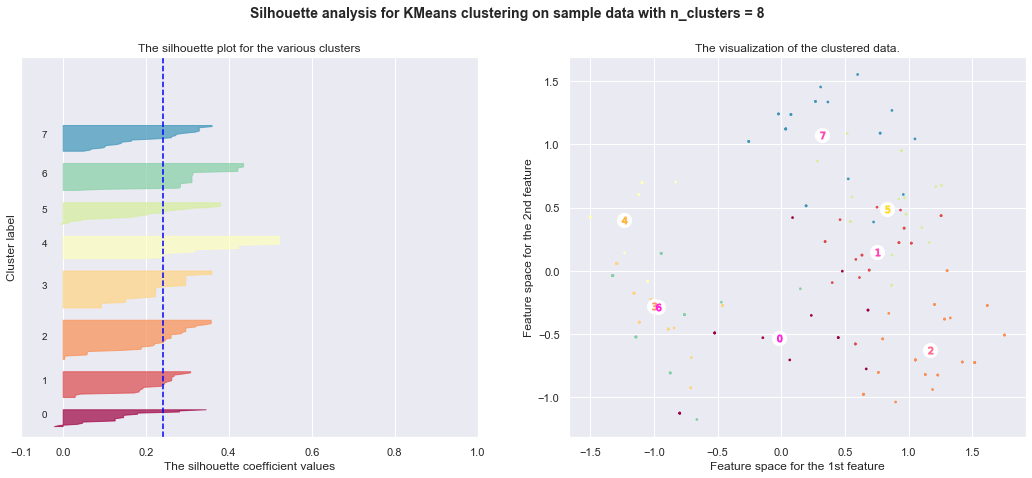

For n_clusters = 9 The average silhouette_score is : 0.24459861741992142


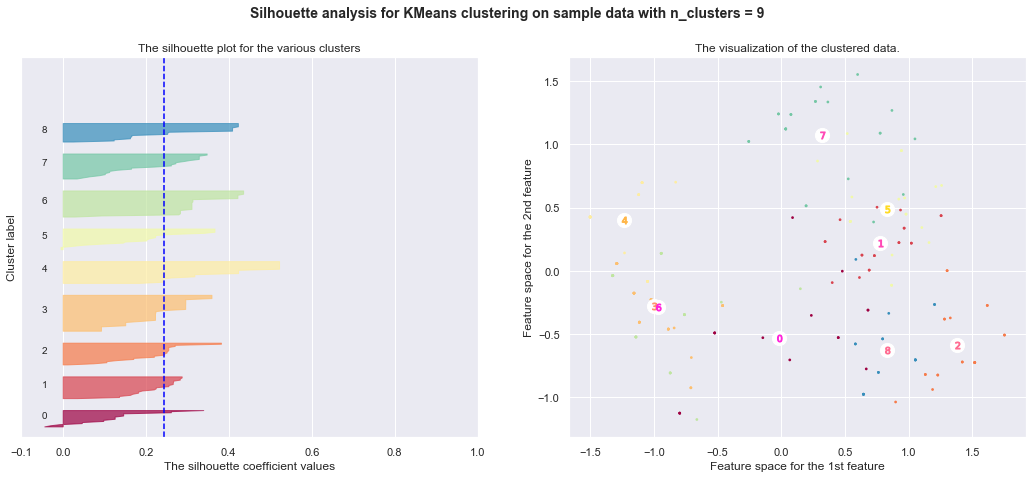

For n_clusters = 10 The average silhouette_score is : 0.2554835999832876


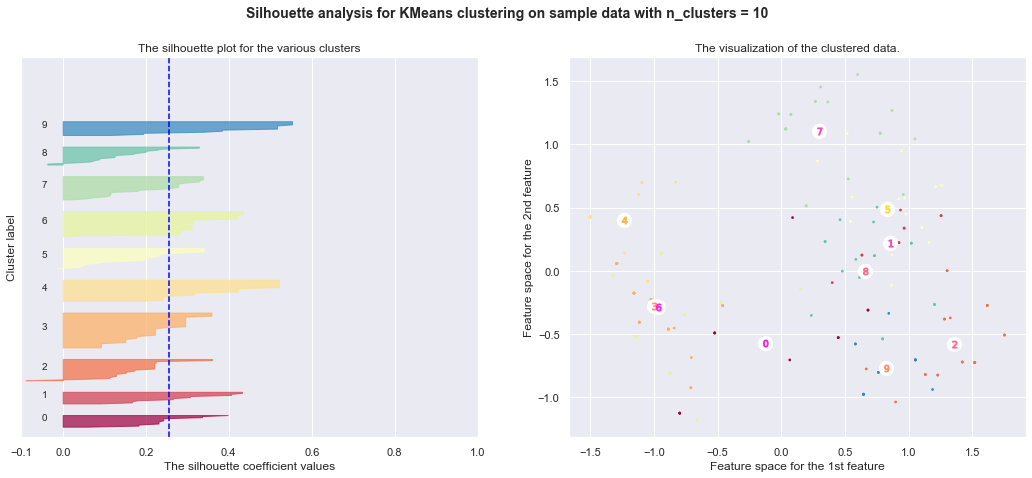

In [65]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters,n_init=10,max_iter=300,random_state=1,n_jobs=-1)
    cluster_labels = clusterer.fit_predict(X_train_pca)
    silhouette_avg = silhouette_score(X_train_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X_train_pca, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="blue", linestyle="--")
    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_train_pca[:, 0], X_train_pca[:, 1], marker='.', s=30, lw=0, alpha=1,
                c=colors)
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

#### * Observe in both elbow plot and silhouette analysis, optimal number of clusters is 2 

In [66]:
opt_clusters=KMeans(n_clusters=2,n_init=10,max_iter=300,random_state=1,n_jobs=-1)

In [67]:
opt_clusters=opt_clusters.fit(X_train_pca)

In [68]:
cluster_labels=opt_clusters.predict(X_train_pca)

In [69]:
opt_clusters.cluster_centers_

array([[ 7.75058112e-01,  1.17685017e-01, -2.60017873e-02,
        -1.18412955e-02, -1.20688309e-02,  3.56610988e-07,
         4.76275603e-02, -2.04150619e-03,  1.71886255e-02,
         6.94350711e-03],
       [-1.02740261e+00, -1.56001069e-01,  3.44674856e-02,
         1.56966010e-02,  1.59982177e-02, -4.72716891e-07,
        -6.31342078e-02,  2.70618262e-03, -2.27849222e-02,
        -9.20418385e-03]])

In [70]:
cluster_labels

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0])

## Q10. Create a new column in the train data and populate it with the cluster labels. 4 points

In [71]:
y_train.index

Int64Index([228,  85, 112, 148, 171, 117, 118,  28,  16, 130,
            ...
            144, 192,  79, 133, 203, 137,  72, 140, 235,  37],
           dtype='int64', length=200)

In [72]:
y_train_new=pd.DataFrame(y_train)

In [73]:
y_train_new['Cluster_Label']=pd.DataFrame(cluster_labels,index=y_train.index)

In [74]:
y_train_new

,Class,Cluster_Label
228,1,1
85,0,1
112,0,0
148,1,1
171,1,1
117,0,0
118,0,0
28,0,0
16,0,0
130,0,0


In [75]:
cluster_train_crosstab = pd.crosstab(y_train_new['Class'], y_train_new['Cluster_Label'], rownames=['True Label'], colnames=['Cluster Label'])
print(cluster_train_crosstab)

Cluster Label    0   1
True Label            
0              113   1
1                1  85


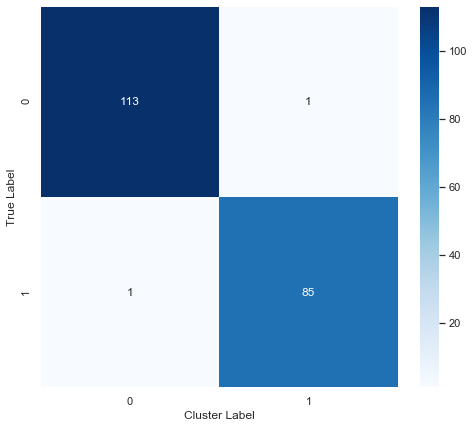

In [76]:
sns.set(rc={'figure.figsize':(8,7)})
sns.heatmap(cluster_train_crosstab, cmap = 'Blues', annot=True, fmt='g')

## Q11. Transform the test data using the same PCA object that was fit on the train data. 4 points

In [77]:
X_test_pca=pca.transform(X_test)

In [78]:
print(X_test_pca.shape)

(50, 10)


In [79]:
X_test_pca

array([[ 2.81831166e-01,  7.87749115e-02,  9.88304167e-01,
        -1.30815387e-01,  4.67863561e-01, -6.49166731e-02,
         1.43002300e-01, -5.74172633e-01, -2.89614106e-01,
        -2.30639165e-01],
       [-5.22859545e-01, -4.90018436e-01,  3.48428492e-01,
        -8.95829145e-01,  1.63426354e-01, -2.05520198e-01,
         2.67900421e-01,  8.88024351e-02, -3.55311646e-02,
        -4.45172246e-01],
       [-8.41161709e-01, -4.50658339e-01,  7.80028758e-01,
         9.93099700e-01,  1.39171394e-01,  3.71134526e-02,
        -1.03441398e-01,  8.11290045e-02, -1.99829921e-01,
         2.35001732e-01],
       [-1.29151899e+00,  5.80674951e-02,  3.97051308e-01,
        -1.08629850e-01,  2.85379231e-01, -7.20282008e-02,
         1.04527730e-01,  2.10820964e-01, -1.78078712e-01,
         4.69220937e-01],
       [ 1.33874091e+00, -4.99134128e-01, -3.56140716e-02,
        -4.61807759e-01,  3.36965956e-01, -2.92556050e-01,
        -9.55171288e-02, -3.31700907e-01,  5.20087426e-01,
        -3.

## Q12. Use the same kmeans object, assign cluster labels to the test data and store it as a feature. 4 points

In [80]:
test_cluster_labels=opt_clusters.predict(X_test_pca)

In [81]:
test_cluster_labels

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [82]:
y_test.index

Int64Index([ 67, 249, 230, 161,  91, 224,  58, 234, 180,   4, 242, 188, 116,
            182, 127,  78, 184,  51,  27,  73, 225,  34,  95, 186, 120, 119,
            246, 239,  38, 216, 226,  44,  62, 208, 160, 229,  39,  31,  18,
            236, 205,  19,  93, 102,  33, 110,  35,  11,  29,   0],
           dtype='int64')

In [83]:
y_test_new=pd.DataFrame(y_test)

In [84]:
y_test_new['Cluster_Label']=pd.DataFrame(test_cluster_labels,index=y_test.index)

In [85]:
y_test_new

,Class,Cluster_Label
67,0,0
249,1,1
230,1,1
161,1,1
91,0,0
224,1,1
58,0,0
234,1,1
180,1,1
4,0,0


In [86]:
cluster_test_crosstab = pd.crosstab(y_test_new['Class'], y_test_new['Cluster_Label'], rownames=['True Label'], colnames=['Cluster Label'])
print(cluster_test_crosstab)

Cluster Label   0   1
True Label           
0              29   0
1               0  21


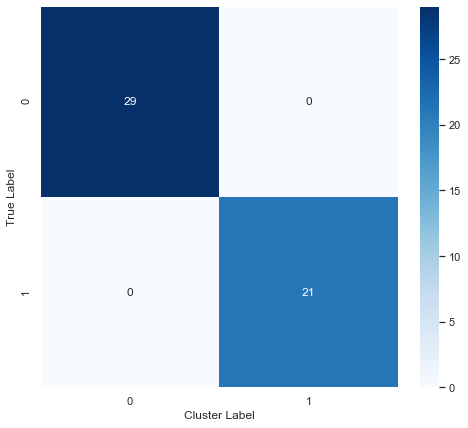

In [87]:
sns.set(rc={'figure.figsize':(8,7)})
sns.heatmap(cluster_test_crosstab, cmap = 'Blues', annot=True, fmt='g')

## Q13. Apply SVC model on train dataset and predict target for test dataset. 6 points

In [88]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score

In [89]:
svc = SVC(kernel='rbf', random_state=1, probability=True)
parameters_grid = {'C':[0.1, 0.5, 1, 10, 30, 40 ,50, 75, 100, 500, 1000],
                   'gamma':[0.001, 0.005, 0.01, 0.05, 0.07, 0.1, 0.5, 1, 5, 10, 50]}
SVC_model=GridSearchCV(svc, parameters_grid)

In [90]:
SVC_model.fit(X_train_pca, y_train)

C:\Dist\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 1, 10, 30, 40, 50, 75, 100, 500, 1000],
                         'gamma': [0.001, 0.005, 0.01, 0.05, 0.07, 0.1, 0.5, 1,
                                   5, 10, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [91]:
SVC_model.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
    max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [92]:
SVC_model.best_params_

{'C': 0.1, 'gamma': 0.05}

In [93]:
SVC_model.best_score_

0.995

In [94]:
from sklearn.model_selection import KFold

In [95]:
warnings.filterwarnings('ignore')
kfold = KFold(n_splits=10, random_state=1,shuffle=True)
results = []
scoring = ['accuracy', 'f1']
for score in scoring:
    cv_results = cross_val_score(SVC_model, X_train_pca, y_train, cv=kfold, scoring=score)
    print(score, ":", cv_results)
    results.append(cv_results)

accuracy : [1.   1.   1.   1.   0.95 1.   1.   1.   0.95 1.  ]
f1 : [1.         1.         1.         1.         0.92307692 1.
 1.         1.         0.93333333 1.        ]


In [96]:
print('KFold mean accuracy score for SVM classifier:', results[0].mean())
print('KFold mean f1 score for SVM classifier:', results[1].mean())

KFold mean accuracy score for SVM classifier: 0.99
KFold mean f1 score for SVM classifier: 0.9856410256410257


In [97]:
print('KFold standard deviation for accuracy of SVM classifier:', results[0].std())
print('KFold standard deviation for f1 score of SVM classifier:', results[1].std())

KFold standard deviation for accuracy of SVM classifier: 0.020000000000000018
KFold standard deviation for f1 score of SVM classifier: 0.028809378267052602


## Q14. Check accuracy and confusion matrix. 2 point

In [98]:
print('Model testing score ->', SVC_model.score(X_test_pca, y_test))

Model testing score -> 1.0


In [99]:
SVC_prediction = SVC_model.predict(X_test_pca)

In [100]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, SVC_prediction)
print(confusion_matrix)

[[29  0]
 [ 0 21]]


In [101]:
print(metrics.classification_report(y_test, SVC_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [102]:
predict_crosstab = pd.crosstab(y_test, SVC_prediction, rownames=['True Label'], colnames=['Predicted Label'])
print(predict_crosstab)

Predicted Label   0   1
True Label             
0                29   0
1                 0  21


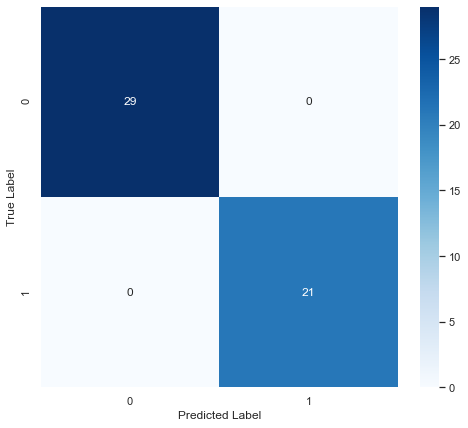

In [103]:
sns.set(rc={'figure.figsize':(8,7)})
sns.heatmap(predict_crosstab, cmap = 'Blues', annot=True, fmt='g')

##### Evaluating model performance using ROC_AUC

In [104]:
from sklearn.metrics import roc_curve

In [105]:
SVC_proba = SVC_model.predict_proba(X_test_pca)[:, 1]

In [106]:
SVC_roc_auc = metrics.roc_auc_score(y_test, SVC_proba)
print(SVC_roc_auc)

1.0


In [107]:
SVC_fpr, SVC_tpr, SVC_thresholds = roc_curve(y_test, SVC_proba)

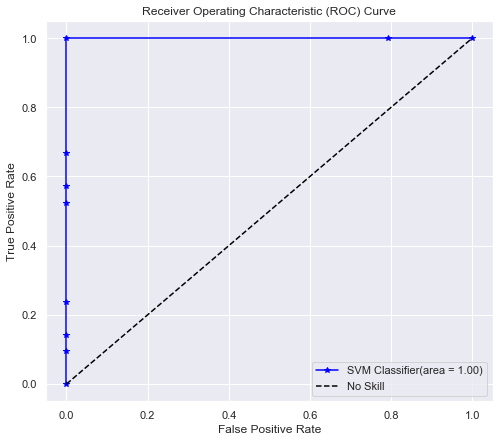

In [108]:
plt.plot(SVC_fpr, SVC_tpr, marker='*', label='SVM Classifier(area = %0.2f)' % SVC_roc_auc, color='blue')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='No Skill') 
plt.title('Receiver Operating Characteristic (ROC) Curve') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

##### Evaluating model performance using Precision-Recall 

In [109]:
from sklearn.metrics import precision_recall_curve

In [110]:
SVC_precision, SVC_recall, SVC_thresholds = precision_recall_curve(y_test, SVC_proba)

In [111]:
SVC_f1 = metrics.f1_score(y_test, SVC_prediction)
print(SVC_f1)

1.0


In [112]:
SVC_precision_recall_auc= metrics.auc(SVC_recall, SVC_precision)
print(SVC_precision_recall_auc)

0.9999999999999999


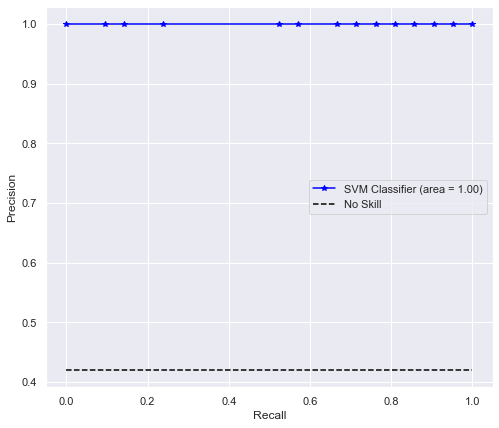

In [113]:
plt.plot(SVC_recall, SVC_precision, marker='*', label='SVM Classifier (area = %0.2f)' % SVC_precision_recall_auc, color='blue')
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill', color='black')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()